In [23]:
import pandas as pd
dfY = pd.read_csv('yorkshire.csv')
# import pandas

In [24]:
dfY.head()
# menampilkan 5 data

,id,age,gender,region,income,married,children,car,mortgage
0,ID12101,48,FEMALE,INNER_CITY,17546.000000,NO,1,NO,NO
1,ID12102,40,MALE,TOWN,30085.100000,YES,3,YES,YES
2,ID12103,51,FEMALE,INNER_CITY,16575.400000,YES,0,YES,NO
3,ID12104,23,FEMALE,TOWN,20375.400000,YES,3,NO,NO
4,ID12105,57,FEMALE,RURAL,15944.690366,YES,0,NO,NO


In [25]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

Text(0, 0.5, 'Income (£)')

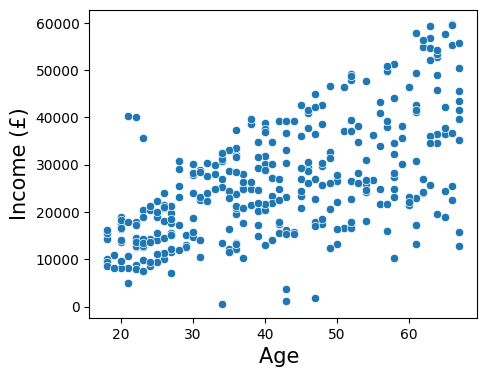

In [26]:
plt.subplots(figsize=(5,4), dpi=100)
ax = sns.scatterplot(x="age", y="income", data=dfY, marker='o')
ax.set_xlabel('Age ', fontsize=15)
ax.set_ylabel('Income (£)',fontsize=15,rotation=90)

In [27]:
regY = linear_model.LinearRegression()
#create a linear regression object

#train the model
regY.fit(dfY["age"].to_numpy().reshape(-1,1), dfY["income"])

LinearRegression()

In [28]:
import numpy as np

print("Regression coefficient beta = %.3f" % (regY.coef_))
print("Regression coefficient alpha = %.3f" % (regY.intercept_))

Regression coefficient beta = 539.115
Regression coefficient alpha = 3631.490


C:\Users\USER\AppData\Local\Temp\ipykernel_6756\2643060628.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Regression coefficient beta = %.3f" % (regY.coef_))


In [29]:
from scipy import stats

beta = stats.pearsonr(dfY["age"], dfY["income"]) [0] * np.std(dfY["income"],ddof=1)/np.std(dfY["age"],ddof=1) 
print("Regression coefficient beta = %.3f" %(beta))

alpha = np.mean(dfY["income"]) - beta * np.mean(dfY["age"])
print("Intercept coefficient alpha = %.3f" % (alpha))

Regression coefficient beta = 539.115
Intercept coefficient alpha = 3631.490


In [31]:
age = 34
income = regY.predict([[age]])
print("Income when you become %d would be £%.2f" %(age,income))

y = alpha + beta * age
print("Income when you become %d would be £%.2f (analytically)" %(age,y))

print("Income = %.3f + %.3f x Age" % (regY.intercept_, regY.coef_))

Income when you become 34 would be £21961.40
Income when you become 34 would be £21961.40 (analytically)
Income = 3631.490 + 539.115 x Age


C:\Users\USER\AppData\Local\Temp\ipykernel_6756\3725464179.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Income when you become %d would be £%.2f" %(age,income))
C:\Users\USER\AppData\Local\Temp\ipykernel_6756\3725464179.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Income = %.3f + %.3f x Age" % (regY.intercept_, regY.coef_))


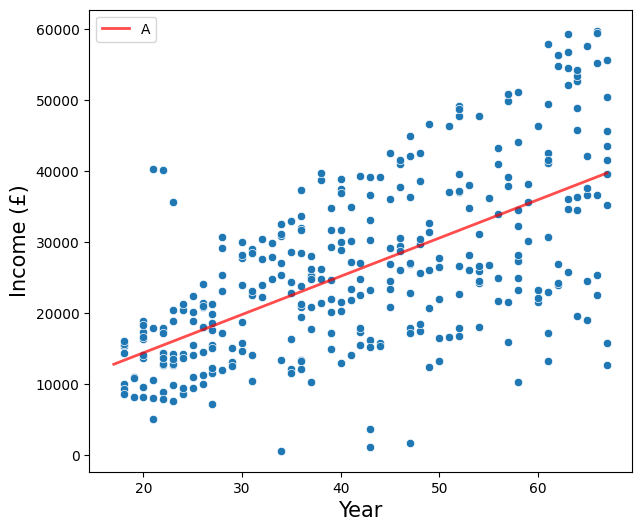

In [33]:
plt.subplots(figsize=(7,6), dpi=100)
ax = sns.scatterplot(x="age", y = "income", data=dfY, marker='o')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Income (£)',fontsize=15,rotation=90)

min = dfY['age'].min()-1
max = dfY['age'].max()+1

model = regY.predict(np.arange(min,max).reshape(-1,1))
ax = sns.lineplot(y=model,x=np.arange(min,max),linestyle='-',color="r",label="A", alpha=0.7,lw=2)

In [36]:
dfNut = pd.read_excel("nutrition.xlsx")
dfNut.head()

,KnowledgeScore,CalciumIntake
0,10,450
1,42,1050
2,38,900
3,15,525
4,22,710


Text(0, 0.5, 'Calcium Intake')

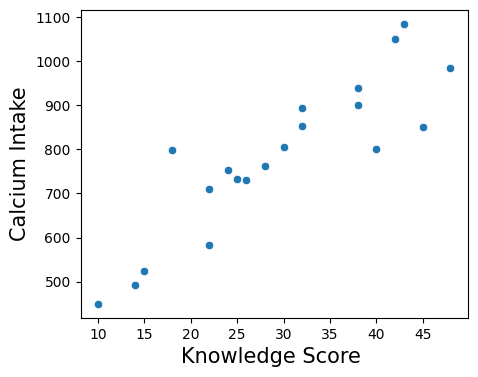

In [38]:
plt.subplots(figsize=(5,4),dpi=100)
ax = sns.scatterplot(x="KnowledgeScore",y="CalciumIntake",
                     data=dfNut,marker='o')
ax.set_xlabel("Knowledge Score ", fontsize=15)
ax.set_ylabel('Calcium Intake', fontsize=15,rotation=90)

In [40]:
x = (dfNut["KnowledgeScore"]-np.mean(dfNut["KnowledgeScore"]))
y = (dfNut["CalciumIntake"]-np.mean(dfNut["CalciumIntake"]))
r1 = np.sum(x*y)/(dfNut.shape[0]-1)/np.std(dfNut["KnowledgeScore"],
ddof=1)/np.std(dfNut["CalciumIntake"], ddof=1)

r2,_ = stats.pearsonr(dfNut["KnowledgeScore"], dfNut["CalciumIntake"])

r3 =np.corrcoef(dfNut["KnowledgeScore"], dfNut["CalciumIntake"])
print("R1: %.3f" % (r1))
print("R2: %.3f" % (r2))
print("R3: %.3f" % (r3[0][1]))



R1: 0.882
R2: 0.882
R3: 0.882


In [41]:
dfNutX = pd.DataFrame(dfNut['KnowledgeScore'])
dfNutY = dfNut.drop('KnowledgeScore',
axis='columns')

regNut = linear_model.LinearRegression()
regNut.fit(dfNutX, dfNutY)


LinearRegression()

In [42]:
print("Regression coefficient beta = %.3f" % (regNut.coef_))
print("Intercept coefficient alpha = %.3f" % (regNut.intercept_))
print("CI = %.3f + %.3f x KS" % (regNut.intercept_, regNut.coef_))

Regression coefficient beta = 13.897
Intercept coefficient alpha = 373.743
CI = 373.743 + 13.897 x KS


C:\Users\USER\AppData\Local\Temp\ipykernel_6756\2396820420.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Regression coefficient beta = %.3f" % (regNut.coef_))
C:\Users\USER\AppData\Local\Temp\ipykernel_6756\2396820420.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Intercept coefficient alpha = %.3f" % (regNut.intercept_))
C:\Users\USER\AppData\Local\Temp\ipykernel_6756\2396820420.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("CI

In [44]:
beta = stats.pearsonr(dfNut["KnowledgeScore"], dfNut["CalciumIntake"])[0] *np.std(dfNut["CalciumIntake"],ddof=1)/np.std(dfNut["KnowledgeScore"],ddof=1)
print("Regression coefficient beta = %.3f" % (beta))
alpha = np.mean(dfNut["CalciumIntake"]) - beta *np.mean(dfNut["KnowledgeScore"])
print("Intercept coefficient alpha = %.3f" % (alpha))

Regression coefficient beta = 13.897
Intercept coefficient alpha = 373.743


In [45]:
from sklearn.metrics import r2_score
predictNut = regNut.predict(dfNutX)
print('R2 (sklearn ):', r2_score(dfNut["CalciumIntake"], predictNut))
#Analytically
ssT = [ ((dfNut["CalciumIntake"][i]-np.mean(dfNut["CalciumIntake"]))**2) for i in range(0,
len(dfNut["CalciumIntake"]))]
ssR = [ ((dfNut["CalciumIntake"][i]-predictNut[i])**2) for i in range(0,
len(dfNut["CalciumIntake"]))]
ssM = [ ((predictNut[i]-np.mean(dfNut["CalciumIntake"]))**2) for i in range(0,
len(dfNut["CalciumIntake"]))]
print ("R2 (method A):", np.sum(ssM)/np.sum(ssT))
print ("R2 (method B):", 1 - np.sum(ssR)/np.sum(ssT))


R2 (sklearn ): 0.7783741285106188
R2 (method A): 0.778374128510618
R2 (method B): 0.7783741285106188


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


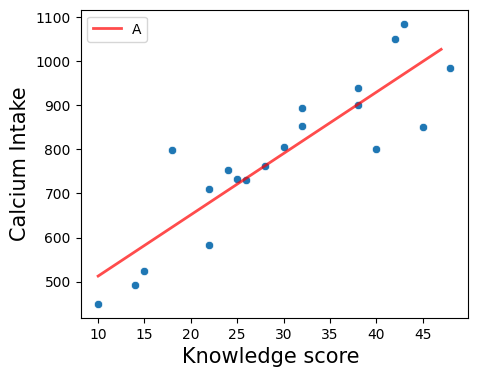

In [46]:
plt.subplots(figsize=(5,4), dpi=100)
ax = sns.scatterplot(x="KnowledgeScore", y="CalciumIntake", data=dfNut, marker='o')
ax.set_xlabel('Knowledge score ',fontsize=15) # set x label
ax.set_ylabel('Calcium Intake',fontsize=15,rotation=90) # set y label
#Note: this depends on the method for constructing nutritionDFX used in TB6
min = np.min(dfNut["KnowledgeScore"])
max = np.max(dfNut["KnowledgeScore"])
predictNut = regNut.predict(np.arange(min,max).reshape(-1,1))
ax = sns.lineplot(y=predictNut.flatten(), x=np.arange(min, max), linestyle='-',
color="r", label="A", alpha=0.7, lw=2)

In [48]:
knowledgeScore = 30

# Prediksi kalsium menggunakan model regresi
calcium = regNut.predict([[knowledgeScore]])
print("Approximate calcium intake when knowledge score is %d would be %.2f" %(knowledgeScore, calcium))

# Hitung kalsium menggunakan formula regresi
CI = regNut.intercept_ + regNut.coef_ * knowledgeScore
print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, CI))


Approximate calcium intake when knowledge score is 30 would be 790.66
Approximate calcium intake when knowledge score is 30 would be 790.66


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Local\Temp\ipykernel_6756\2084618451.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Approximate calcium intake when knowledge score is %d would be %.2f" %(knowledgeScore, calcium))
C:\Users\USER\AppData\Local\Temp\ipykernel_6756\2084618451.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, CI))
